# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import scipy.stats as sts
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
weather_response = requests.get(query_url)
weather_json = weather_response.json()
# print(json.dumps(weather_json, indent = 4))

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_count = 0

city_dict = {}
city_list = []

city_name_list = []
city_lat_list = []
city_lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []



print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    city_count += 1
    
    if city_count <= 9:
        
        try:
            print(f'Processing Record Number 0{city_count} | {city}')
            query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            city_name_list.append(weather_json['name'])
            city_lat_list.append(weather_json['coord']['lat'])
            city_lng_list.append(weather_json['coord']['lon'])
            max_temp_list.append(weather_json['main']['temp_max'])
            humidity_list.append(weather_json['main']['humidity'])
            cloudiness_list.append(weather_json['clouds']['all'])
            wind_speed_list.append(weather_json['wind']['speed'])
            country_list.append(weather_json['sys']['country'])
            date_list.append(weather_json['dt'])

        except:
            print("City not found. Skipping...")
        
    else:
        try:
            print(f'Processing Record Number {city_count} | {city}')
            query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            city_name_list.append(weather_json['name'])
            city_lat_list.append(weather_json['coord']['lat'])
            city_lng_list.append(weather_json['coord']['lon'])
            max_temp_list.append(weather_json['main']['temp_max'])
            humidity_list.append(weather_json['main']['humidity'])
            cloudiness_list.append(weather_json['clouds']['all'])
            wind_speed_list.append(weather_json['wind']['speed'])
            country_list.append(weather_json['sys']['country'])
            date_list.append(weather_json['dt'])

        except:
            print("City not found. Skipping...")
        
city_dict = {'City_Name': city_name_list,
                'Lat': city_lat_list, 
                'Lon': city_lng_list, 
                'Max_Temp': max_temp_list, 
                'Humidity': humidity_list,
                'Clouds': cloudiness_list,
                'Wind_Speed': wind_speed_list,
                'Country': country_list,
                'Date': date_list}


Beginning Data Retrieval
-----------------------------
Processing Record Number 01 | port alfred
Processing Record Number 02 | carnarvon
Processing Record Number 03 | busselton
Processing Record Number 04 | nouakchott
Processing Record Number 05 | aklavik
Processing Record Number 06 | airai
Processing Record Number 07 | ushuaia
Processing Record Number 08 | puerto ayora
Processing Record Number 09 | satitoa
City not found. Skipping...
Processing Record Number 10 | thinadhoo
Processing Record Number 11 | pevek
Processing Record Number 12 | saint-philippe
Processing Record Number 13 | bredasdorp
Processing Record Number 14 | hobyo
Processing Record Number 15 | nizhneyansk
City not found. Skipping...
Processing Record Number 16 | mahebourg
Processing Record Number 17 | barentsburg
City not found. Skipping...
Processing Record Number 18 | shingu
Processing Record Number 19 | margate
Processing Record Number 20 | butaritari
Processing Record Number 21 | jamestown
Processing Record Number 22

Processing Record Number 193 | huesca
Processing Record Number 194 | otane
Processing Record Number 195 | hilo
Processing Record Number 196 | nushki
Processing Record Number 197 | atuona
Processing Record Number 198 | georgetown
Processing Record Number 199 | werda
Processing Record Number 200 | diapaga
Processing Record Number 201 | aipe
Processing Record Number 202 | namatanai
Processing Record Number 203 | roald
Processing Record Number 204 | san quintin
Processing Record Number 205 | upernavik
Processing Record Number 206 | bonavista
Processing Record Number 207 | caravelas
Processing Record Number 208 | dubbo
Processing Record Number 209 | yarim
Processing Record Number 210 | baruun-urt
Processing Record Number 211 | corner brook
Processing Record Number 212 | kaeo
Processing Record Number 213 | tabiauea
City not found. Skipping...
Processing Record Number 214 | coquimbo
Processing Record Number 215 | port elizabeth
Processing Record Number 216 | port augusta
Processing Record Num

City not found. Skipping...
Processing Record Number 387 | mount gambier
Processing Record Number 388 | saint-augustin
Processing Record Number 389 | kawalu
Processing Record Number 390 | alofi
Processing Record Number 391 | lorengau
Processing Record Number 392 | arona
Processing Record Number 393 | tautira
Processing Record Number 394 | emerald
Processing Record Number 395 | cap malheureux
Processing Record Number 396 | le port
Processing Record Number 397 | tigzirt
Processing Record Number 398 | husavik
Processing Record Number 399 | dingle
Processing Record Number 400 | lazarev
Processing Record Number 401 | riyadh
Processing Record Number 402 | pafos
Processing Record Number 403 | luganville
Processing Record Number 404 | byron bay
Processing Record Number 405 | bilopillya
Processing Record Number 406 | tuatapere
Processing Record Number 407 | tomatlan
Processing Record Number 408 | timiryazevskiy
Processing Record Number 409 | sijunjung
Processing Record Number 410 | mandurah
Pro

City not found. Skipping...
Processing Record Number 579 | tezu
Processing Record Number 580 | rio grande
Processing Record Number 581 | port macquarie
Processing Record Number 582 | hope
Processing Record Number 583 | honiara
Processing Record Number 584 | piqua
Processing Record Number 585 | davila
Processing Record Number 586 | saint anthony
Processing Record Number 587 | gobabis
Processing Record Number 588 | alta floresta
Processing Record Number 589 | ahuimanu
Processing Record Number 590 | derzhavinsk
Processing Record Number 591 | farmington
Processing Record Number 592 | christchurch
Processing Record Number 593 | siderno
Processing Record Number 594 | daura
Processing Record Number 595 | oxapampa
Processing Record Number 596 | la paz
Processing Record Number 597 | sambava
Processing Record Number 598 | kazalinsk
City not found. Skipping...
Processing Record Number 599 | sohag
Processing Record Number 600 | rawson
Processing Record Number 601 | salalah
Processing Record Number

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame(city_dict)

In [6]:
city_df.set_index('City_Name')

,Lat,Lon,Max_Temp,Humidity,Clouds,Wind_Speed,Country,Date
City_Name,,,,,,,,
Port Alfred,-33.59,26.89,57.94,71,0,14.32,ZA,1598572677
Carnarvon,-24.87,113.63,66.20,100,40,8.05,AU,1598572678
Busselton,-33.65,115.33,51.01,85,0,1.30,AU,1598572678
Nouakchott,18.09,-15.98,84.20,79,20,10.29,MR,1598572678
Aklavik,68.22,-135.01,42.80,75,75,6.93,CA,1598572473
...,...,...,...,...,...,...,...,...
Prince Rupert,54.32,-130.32,60.80,72,90,9.17,CA,1598572643
Tacuarembó,-31.73,-55.98,65.28,97,99,9.91,UY,1598572766
Torres,-29.34,-49.73,64.45,82,0,5.77,BR,1598572766


In [7]:
city_df.to_csv('city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# checks to see if there are any cities in the list with more than 100% humidity.

extra_humid = 0

for h in city_df['Humidity']:
    if h > 100:
        extra_humid =+ 1
        
if extra_humid > 0:
    print("You need to do this step!")

else:
    print("You can skip this step!")

You can skip this step!


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
current_date = date.today()

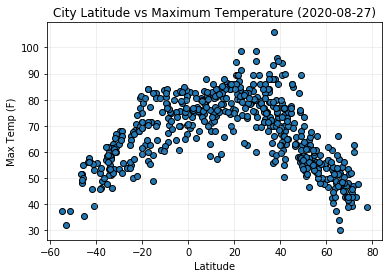

In [10]:
lat_plot = city_df['Lat']
temp_plot = city_df['Max_Temp']

plt.scatter(lat_plot, temp_plot, edgecolor="k")
plt.title(f'City Latitude vs Maximum Temperature ({current_date})')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Lat_vs_Temp.png')

# Analyzing how maximum temperature is affected by the change in latitude

## Latitude vs. Humidity Plot

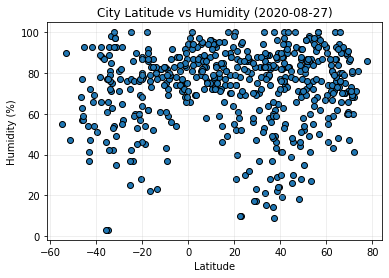

In [11]:
humidity_plot = city_df['Humidity']

plt.scatter(lat_plot, humidity_plot, edgecolor="k")
plt.title(f'City Latitude vs Humidity ({current_date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Lat_vs_Humidity.png')

# Analyzing how humidity is affected by the change in latitude

## Latitude vs. Cloudiness Plot

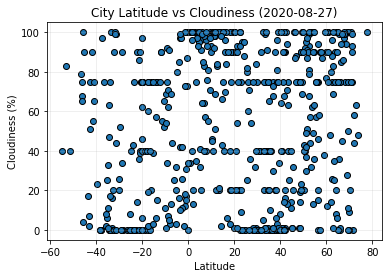

In [12]:
clouds_plot = city_df['Clouds']

plt.scatter(lat_plot, clouds_plot, edgecolor="k")
plt.title(f'City Latitude vs Cloudiness ({current_date})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Lat_vs_Clouds.png')

# Analyzing how cloudiness is affected by the change in latitude

## Latitude vs. Wind Speed Plot

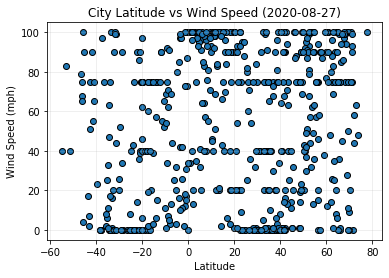

In [13]:
windSpeed_plot = city_df['Wind_Speed']

plt.scatter(lat_plot, clouds_plot, edgecolor="k")
plt.title(f'City Latitude vs Wind Speed ({current_date})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(b = True, alpha = .25)
plt.savefig('Lat_vs_WindSpeed.png')

# Analyzing how cloudiness is affected by the change in latitude

## Linear Regression

In [14]:
#Isolating the northern latitudes
lat_north = city_df.loc[city_df['Lat']>=0]
north_df = pd.DataFrame(lat_north)

In [15]:
#isolating the southern latitudes
lat_south = city_df.loc[city_df['Lat']<0]
south_df = pd.DataFrame(lat_south)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

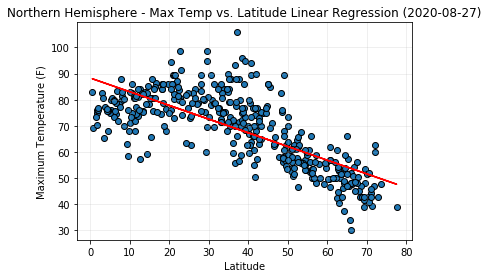

The linear regression line equation is: y = -0.52x + 88.31.
The correlation is: -0.74 indicating a strong negative correlation.


In [16]:
x_values = north_df['Lat']
y_values = north_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.grid(b = True, alpha = .25)
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)} indicating a strong negative correlation.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

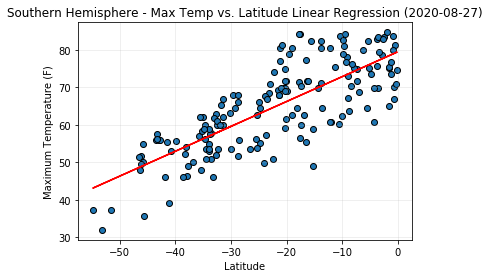

The linear regression line equation is: y = 0.66x + 79.5.
The correlation is: 0.78 indicating a strong positive correlation.


In [17]:
x_values = south_df['Lat']
y_values = south_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)} indicating a strong positive correlation.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

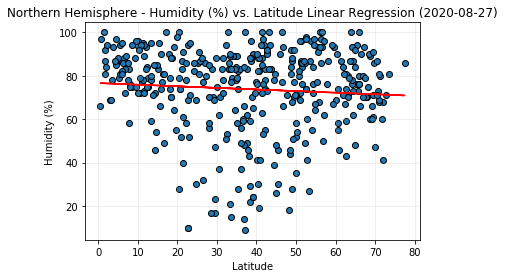

The linear regression line equation is: y = -0.07x + 76.6.
The correlation is: -0.08, which does not indicate a very strong coorelation.


In [18]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b = True, alpha = .25)
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

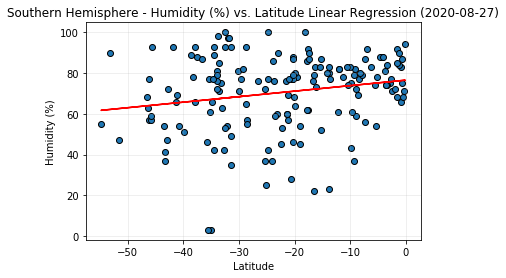

The linear regression line equation is: y = 0.27x + 76.53.
The correlation is: 0.2, which does not indicate a very strong coorelation.


In [19]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

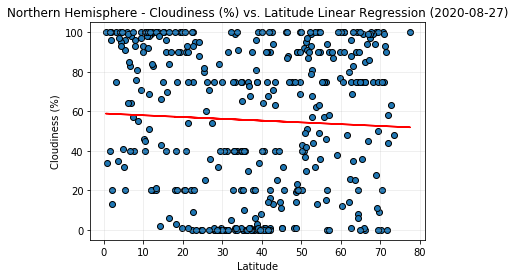

The linear regression line equation is: y = -0.09x + 58.91.
The correlation is: -0.05, which indicates there is no coorelation.


In [20]:
x_values = north_df['Lat']
y_values = north_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b = True, alpha = .25)
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which indicates there is no coorelation.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

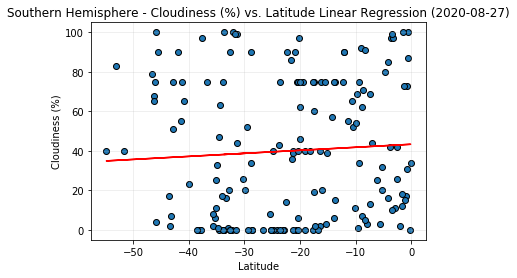

The linear regression line equation is: y = 0.15x + 43.34.
The correlation is: 0.06, which does not indicate a very strong coorelation.


In [21]:
x_values = south_df['Lat']
y_values = south_df['Clouds']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

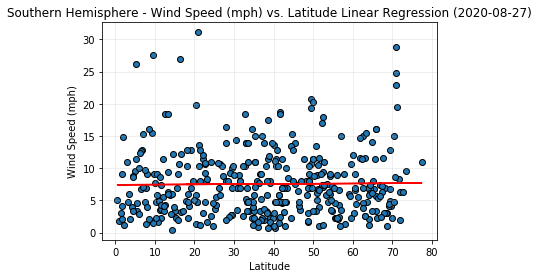

The linear regression line equation is: y = 0.0x + 7.42.
The correlation is: 0.01, which does not indicate a very strong coorelation.


In [22]:
x_values = north_df['Lat']
y_values = north_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

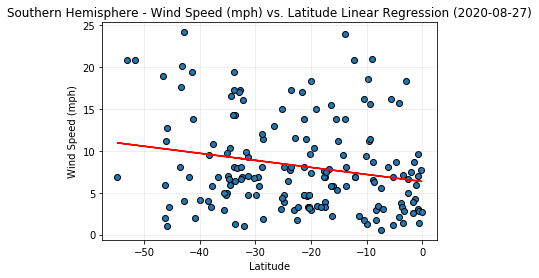

The linear regression line equation is: y = -0.08x + 6.35.
The correlation is: -0.21, which does not indicate a very strong coorelation.


In [23]:
x_values = south_df['Lat']
y_values = south_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor="k")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b = True, alpha = .25)
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({current_date})')
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f'The linear regression line equation is: {line_eq}.')
print(f'The correlation is: {round(correlation[0],2)}, which does not indicate a very strong coorelation.')